In [77]:
import networkx as nx
import acopy
import time
import matplotlib.pyplot as plt
import numpy as np

## Question 2

It seems like acopy needs distances to be coded as 'weight' so I need to rename the 'cost' attribute to 'weight'

#### Question 2b

In [3]:
g_berlin = nx.read_gml('../../data/tsp/../../data/tsp/berlin52.gml')
g_brazil = nx.read_gml('../../data/tsp/../../data/tsp/brazil58.gml')
g_brg = nx.read_gml('../../data/tsp/../../data/tsp/brg180.gml')
g_gr = nx.read_gml('../../data/tsp/../../data/tsp/gr229.gml')
g_pr = nx.read_gml('../../data/tsp/../../data/tsp/pr439.gml')

print('g_berlin has', g_berlin.number_of_nodes(), 'nodes and', g_berlin.number_of_edges(), 'edges')
print('g_brazil has', g_brazil.number_of_nodes(), 'nodes and', g_brazil.number_of_edges(), 'edges')
print('g_brg has', g_brg.number_of_nodes(), 'nodes and', g_brg.number_of_edges(), 'edges')
print('g_gr has', g_gr.number_of_nodes(), 'nodes and', g_gr.number_of_edges(), 'edges')
print('g_pr has', g_pr.number_of_nodes(), 'nodes and', g_pr.number_of_edges(), 'edges')

g_berlin has 52 nodes and 2652 edges
g_brazil has 58 nodes and 3306 edges
g_brg has 180 nodes and 32220 edges
g_gr has 229 nodes and 52212 edges
g_pr has 439 nodes and 192282 edges


#### Question 2d

In [23]:
def rename_cost_weight(G):
    # Iterate through all edges in G
    for u, v, attrs in G.edges(data=True):
        if 'cost' in attrs:
            # Rename 'cost' to 'weight'
            attrs['weight'] = attrs.pop('cost')

# # Check the first 5 edges to ensure 'cost' has been renamed to 'weight'
rename_cost_weight(g_berlin)
print(list(g_berlin.edges(data=True))[:5])
rename_cost_weight(g_brazil)
rename_cost_weight(g_brg)
rename_cost_weight(g_gr)
rename_cost_weight(g_pr)


[('0', '1', {'pheromone': 0.00022344521551333316, 'weight': 666.1080993352356}), ('0', '2', {'pheromone': 0.0021771484545130633, 'weight': 281.1138559374119}), ('0', '3', {'pheromone': 2.0788686828312823e-05, 'weight': 395.6008088970497}), ('0', '4', {'pheromone': 3.622976025985899e-05, 'weight': 291.2043955712207}), ('0', '5', {'pheromone': 7.460483618897342e-05, 'weight': 326.266762021509})]


In [33]:
# for now just choosing fairly random params based on 
# alpha affects pheromone importance
# beta affects distance/weight importance
# rho is pheromone evaporation
# Q is amount of pheromone ants release 
solver = acopy.Solver(rho=.03, q=1)
colony = acopy.Colony(alpha=1, beta=5) 

In [68]:
%%time
tour = solver.solve(g_gr, colony, limit=10, gen_size = 25 
                   )

CPU times: user 1min 38s, sys: 8.98 ms, total: 1min 38s
Wall time: 1min 38s


In [61]:
tour.cost

7886.40394663114

#### Question 2e

In [69]:
# todo: average over multiple iterations
times = []
graphs = [g_berlin, g_brazil, g_brg, g_gr, g_pr]
for g in graphs:
    start_time = time.time()
    solver = acopy.Solver(rho=0.03, q=1)
    colony = acopy.Colony(alpha=1, beta=5) 
    tour = solver.solve(g, colony, limit=10, gen_size = 25)
    end_time = time.time()
    iteration_time = end_time - start_time
    times.append(iteration_time)

In [70]:
710/60

11.833333333333334

In [71]:
times

[1.1383576393127441,
 1.5274763107299805,
 42.30398106575012,
 82.89480423927307,
 624.7210221290588]

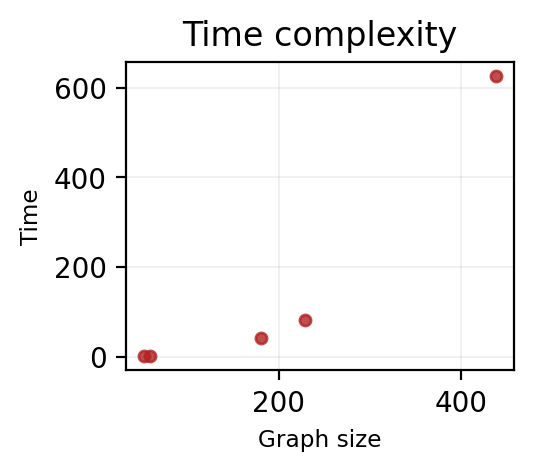

In [102]:
g_sizes = [g.number_of_nodes() for g in graphs]

fig, ax = plt.subplots(1,1,figsize=(2.5,2),dpi=200)
ax.plot(g_sizes, times,'o', color='firebrick', alpha=0.8,  ms = 4)

ax.set_xlabel("Graph size",fontsize='small')
ax.set_ylabel("Time",fontsize='small')
ax.grid(linewidth=0.7, color='#999999', alpha=0.15, linestyle='-')
ax.set_title('Time complexity')

# # Generate points for polynomial and exponential time
# g_sizes_extended = np.linspace(min(g_sizes), max(g_sizes), 100)

# # Polynomial time (e.g., O(n^2))
# polynomial_time = 0.001 * g_sizes_extended ** 2

# # Exponential time (e.g., O(2^n))
# exponential_time = 1e-129 * 2 ** g_sizes_extended

# ax.plot(g_sizes_extended, polynomial_time, label='Polynomial (n^2)', linestyle='--')
# ax.plot(g_sizes_extended, exponential_time, label='Exponential (2^n)', linestyle='-.')

plt.savefig('figs/tsp_timecomplexity.pdf', dpi=425, bbox_inches='tight')
plt.savefig('figs/tsp_timecomplexity.png', dpi=425, bbox_inches='tight')

## Question 3